<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2004/Ch4_Neural_network_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.
- 신경망이 학습할 수 있도록 해주는 **지표**인 손실 함수를 소개하고, 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표이다.

# 4.1 데이터에서 학습한다!
- 신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.
- 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다. 

## 4.1.2 훈련 데이터와 시험 데이터
- 기계학습 문제는 데이터를 **훈련 데이터**와 **시험 데이터**로 나눠 학습과 실험을 수행하는 것이 일반적이다. 
- 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다.
- 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.
- 한 데이터셋에만 지나치게 최적화된 상태를 **오버피팅**이라고 한다.

# 4.2 손실 함수
- 신경망 학습에서 사용하는 지표
- 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

## 4.2.1 평균 제곱 오차
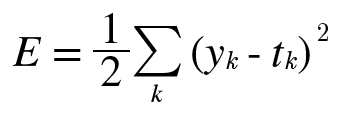
- 여기서 yk는 신경망의 출력, tk는 정답 레이블, k는 데이터의 차원 수를 나타낸다.

In [4]:
import numpy as np

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

위처럼 한 원소만 1로하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라고 한다.

In [2]:
# 각 원소의 출력과 정답 레이블의 차를 제곱한 후, 그 총합을 구한다.
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [5]:
# 정답은 "2"
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# 예 2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉 정답에 더 가까울 것으로 판단할 수 있다.

## 4.2.2 교차 엔트로피 오차
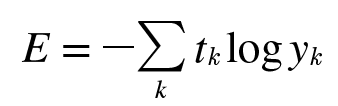
- log는 밑이 e인 자연로그이다. yk는 신경망의 출력, tk는 정답 레이블이다.
- tk는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다 (원-핫 인코딩)
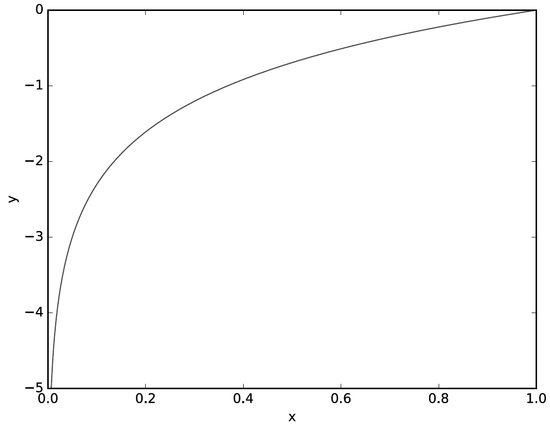
- x가 1일 때 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아진다. 

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546